In [4]:
%run lib.ipynb

In [5]:
def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, h, tol=1e-6):
                                                                            #x0: Lower boundary value of x, y0 = y(x0)
                                                                            #xf: Upper boundary value of x, yf = y(xf)
                                                                            #z = dy/dx 
    x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess1, xf, h)
    yn = y[-1]

    if abs(yn - yf) > tol:
        if yn < yf:
            z_l = z_guess1
            yl = yn

            x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess2, xf, h)
            yn = y[-1]

            if yn > yf:
                z_h = z_guess2
                yh = yn

                # calculate zeta using Lagrange interpolation
                zeta = lagrange_interpolation(z_h, z_l, yh, yl, yf)

                # using this zeta to solve using RK4
                x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, zeta, xf, h)
                return x, y, z

            else:
                print("Bracketing failed. Change your set of guesses.")


        elif yn > yf:
            z_h = z_guess1
            yh = yn

            x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, z_guess2, xf, h)
            yn = y[-1]

            if yn < yf:
                z_l = z_guess2
                yl = yn

                # calculate zeta using Lagrange interpolation
                zeta = lagrange_interpolation(z_h, z_l, yh, yl, yf)

                x, y, z = runge_kutta(d2ydx2, dydx, x0, y0, zeta, xf, h)
                return x, y, z

            else:
                print("Bracketing failed. Change your set of guesses.")


    else:
        return x, y, z         # bang-on solution with z_guess1
    
    
    


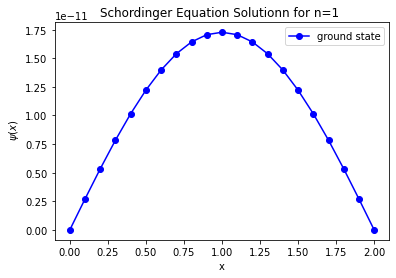

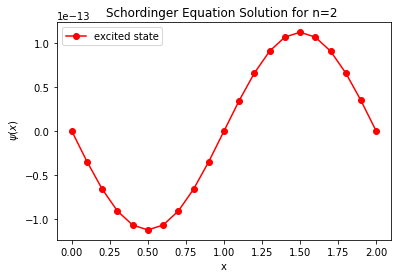

In [6]:
#Q3
# solv Schordinger Equation

def ad2ydt2(t, y, z):   #ground state
    return -(math.pi**2)*y/4


def bd2ydt2(t, y, z):#ecxcited state
    return -(math.pi**2)*y

def dydt(t, y, z):
    return z

# Define boundary values
t_i = 0
t_f = 2
y_i = 0
y_f = 0

t, y, z = shooting_method(ad2ydt2, dydt, t_i, y_i, t_f, y_f, -2, 10, h=0.1)

plt.plot(t,y,'b-o',label='ground state')
plt.xlabel('x')
plt.ylabel(' $\psi (x)$')
plt.title('Schordinger Equation Solutionn for n=1 ')
plt.legend()
plt.show()


t, y, z = shooting_method(bd2ydt2, dydt, t_i, y_i, t_f, y_f, -2, 10, h=0.1)

plt.plot(t,y,'r-o',label='excited state' )
plt.xlabel('x')
plt.ylabel(' $\psi (x)$')
plt.title('Schordinger Equation Solution for n=2 ')
plt.legend()